C:\Users\kubra\AppData\Local\Temp\ipykernel_7704\2896735821.py:6: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg = electrocardiogram()


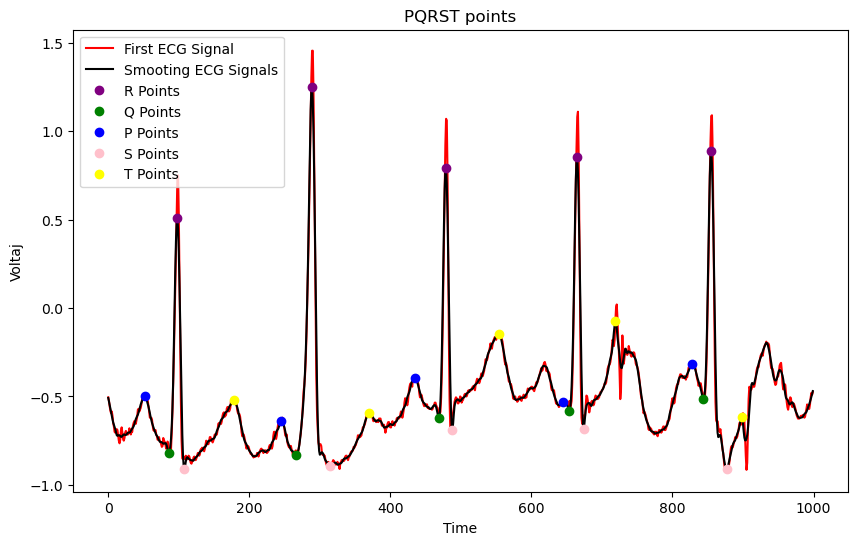

PQ interval: 0.09 s
QR interval: 0.03 s
RS interval: 0.03 s
ST interval: 0.19 s
PT interval: 0.35 s
PP interval: 0.54 s
QQ interval: 0.50 s
TP interval: 0.19 s


In [111]:
#Kübra Uçar - 191805067

from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.misc import electrocardiogram

ecg = electrocardiogram()
fs = 360

lower = 18000
upper = 19000
x = ecg[lower:upper]

# Smooting
window_length = 15  
polyorder = 3
x_smooth = savgol_filter(x, window_length, polyorder)

# R Points
peaks, _ = find_peaks(x_smooth, distance=150)

# Q, P, S, T Points
q_points, p_points, s_points, t_points = [], [], [], []
for r in peaks:
    left_segment = x_smooth[:r]  # R noktasının solundaki segment
    q_candidates, _ = find_peaks(-left_segment, width=5)  # En yüksek negatif tepe noktaları
    q = None
    for q_candidate in q_candidates:
        if q_candidate < r - 5:  # R noktasından 5 birim önceki en yüksek negatif tepe
            q = q_candidate
    if q is not None:
        q_points.append(q)

    p_candidates, _ = find_peaks(left_segment, width=5, distance=20)  # En yüksek pozitif tepe noktaları
    p = None
    for p_candidate in p_candidates:
        if p_candidate < r - 5:  # R noktasından 5 birim önceki en yüksek pozitif tepe
            p = p_candidate
    if p is not None:
        p_points.append(p)
    
    right_segment = x_smooth[r:]  # R noktasının sağındaki segment
    s, _ = find_peaks(-right_segment, distance=20)  # En yüksek negatif tepe noktası
    if s.size > 0:
        s_points.append(s[0] + r)
    
    t, _ = find_peaks(right_segment, width=5)  # En yüksek pozitif tepe noktası
    if t.size > 0:
        t_points.append(t[0] + r)

# Show points
plt.figure(figsize=(10,6))
plt.plot(x, label='First ECG Signal',color='red')
plt.plot(x_smooth, label='Smooting ECG Signals',color='black')
plt.plot(peaks, x_smooth[peaks], "o", color='purple', label='R Points')
plt.plot(q_points, x_smooth[q_points], "o", color='green', label='Q Points')
plt.plot(p_points, x_smooth[p_points], "o", color='blue', label='P Points')
plt.plot(s_points, x_smooth[s_points], "o", color='pink', label='S Points')
plt.plot(t_points, x_smooth[t_points], "o", color='yellow', label='T Points')
plt.xlabel('Time')
plt.ylabel('Voltaj')
plt.title('PQRST points')
plt.legend()
plt.show()

rate = 1/fs
pq = (q_points[0]-p_points[0]) * rate
qr = (peaks[0] - q_points[0])* rate
rs = (s_points[0] - peaks[0])* rate
st = (t_points[0] - s_points[0])* rate
pt = (t_points[0] - p_points[0])* rate

pp = (p_points[1] - p_points[0])* rate
qq = (q_points[1] - q_points[0])* rate
tp = (p_points[1] - t_points[0])* rate


print(f"PQ interval: {pq:.2f} s")
print(f"QR interval: {qr:.2f} s")
print(f"RS interval: {rs:.2f} s")
print(f"ST interval: {st:.2f} s")
print(f"PT interval: {pt:.2f} s")
print(f"PP interval: {pp:.2f} s")
print(f"QQ interval: {qq:.2f} s")
print(f"TP interval: {tp:.2f} s")